In [3]:
pip install scikit-learn

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 6.9 MB/s eta 0:00:02
   ---- ----------------------------------- 1.1/10.6 MB 13.7 MB/s eta 0:00:01
   ------- -------------------------------- 2.0/10.6 MB 16.1 MB/s eta 0:00:01
   ----------- ---------------------------- 2.9/10.6 MB 17.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.8/10.6 MB 17.3 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/10.6 MB 17.6 MB/s eta 0:00:01
   --------------------- ------------------ 5.6/10.6 MB 17.9 MB/s eta 0:00:01
   ------------------------ --------------- 6.5/10.6 MB 18.0 MB/s eta 0:00:01
   --------------------------- ------------ 7.3/10.6 MB 18.0 MB/s eta 0:00:01
   ------------------------------- -------- 8.3/10.6 MB 18.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.1/10.6 MB 18.2 MB/s eta 0:00:01
   ------------------------------------- -- 10.0/10.6 MB 18.3 MB/s eta 0:

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [5]:
data_path = 'Financial Analytics data.csv'
df = pd.read_csv(data_path)


In [6]:
# Get the list of all columns
columns_list = df.columns.tolist()
print("List of all columns:", columns_list)


List of all columns: ['S.No.', 'Name', 'Mar Cap - Crore', 'Sales Qtr - Crore', 'Unnamed: 4']


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              488 non-null    int64  
 1   Name               488 non-null    object 
 2   Mar Cap - Crore    479 non-null    float64
 3   Sales Qtr - Crore  365 non-null    float64
 4   Unnamed: 4         94 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 19.2+ KB
None


In [8]:
print(df.isnull().sum())

S.No.                  0
Name                   0
Mar Cap - Crore        9
Sales Qtr - Crore    123
Unnamed: 4           394
dtype: int64


In [9]:
df = df.drop(df.columns[4], axis=1)


In [10]:
df = df.drop_duplicates()

In [12]:
# Summary statistics of numerical features
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
            S.No.  Mar Cap - Crore  Sales Qtr - Crore
count  488.000000       479.000000         365.000000
mean   251.508197     28043.857119        4395.976849
std    145.884078     59464.615831       11092.206185
min      1.000000      3017.070000          47.240000
25%    122.750000      4843.575000         593.740000
50%    252.500000      9885.050000        1278.300000
75%    378.250000     23549.900000        2840.750000
max    500.000000    583436.720000      110666.930000


In [14]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
df[['Mar Cap - Crore', 'Sales Qtr - Crore']] = imputer.fit_transform(df[['Mar Cap - Crore', 'Sales Qtr - Crore']])

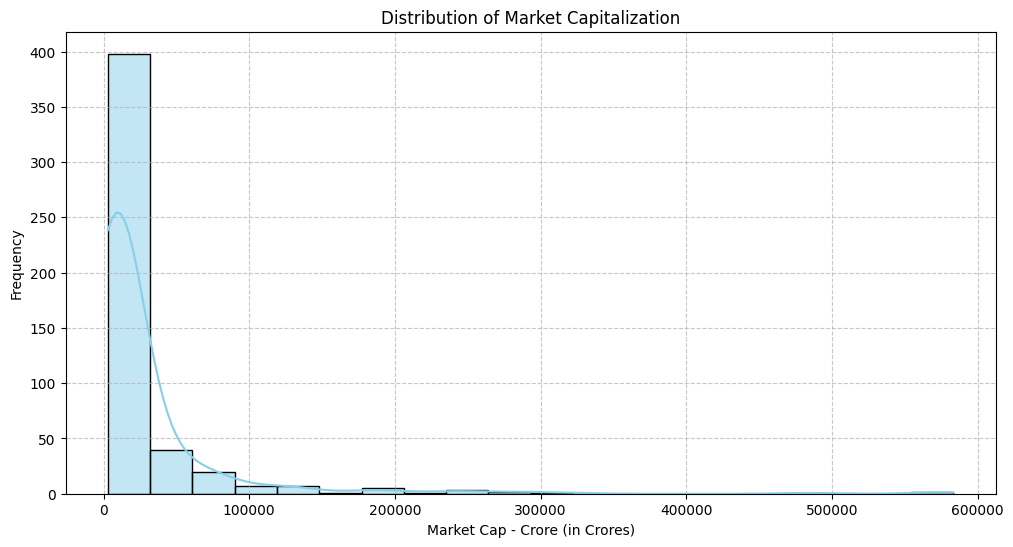

In [15]:
# Distribution of Market Cap - Crore
plt.figure(figsize=(12, 6))
sns.histplot(df['Mar Cap - Crore'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Market Capitalization')
plt.xlabel('Market Cap - Crore (in Crores)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

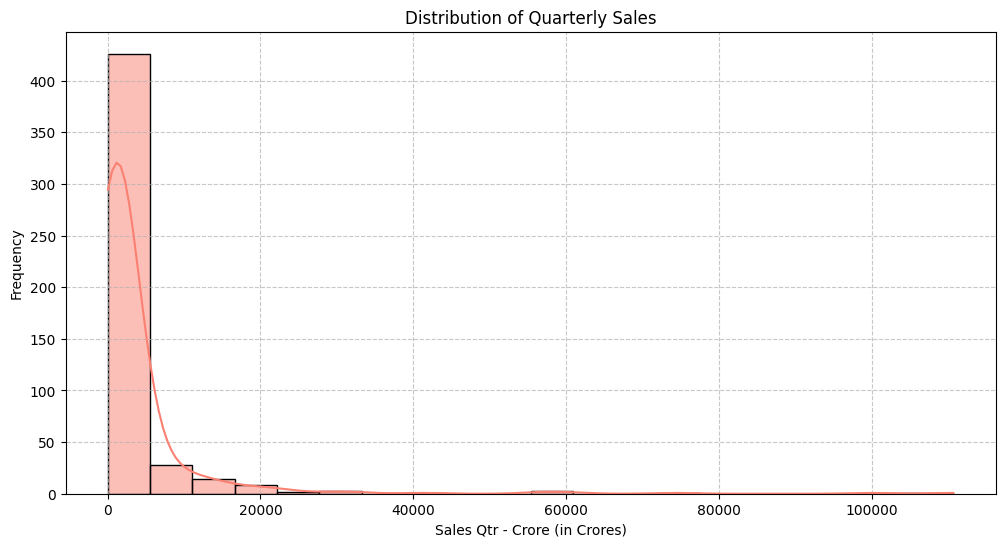

In [16]:
# Distribution of Quarterly Sales
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales Qtr - Crore'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Quarterly Sales')
plt.xlabel('Sales Qtr - Crore (in Crores)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

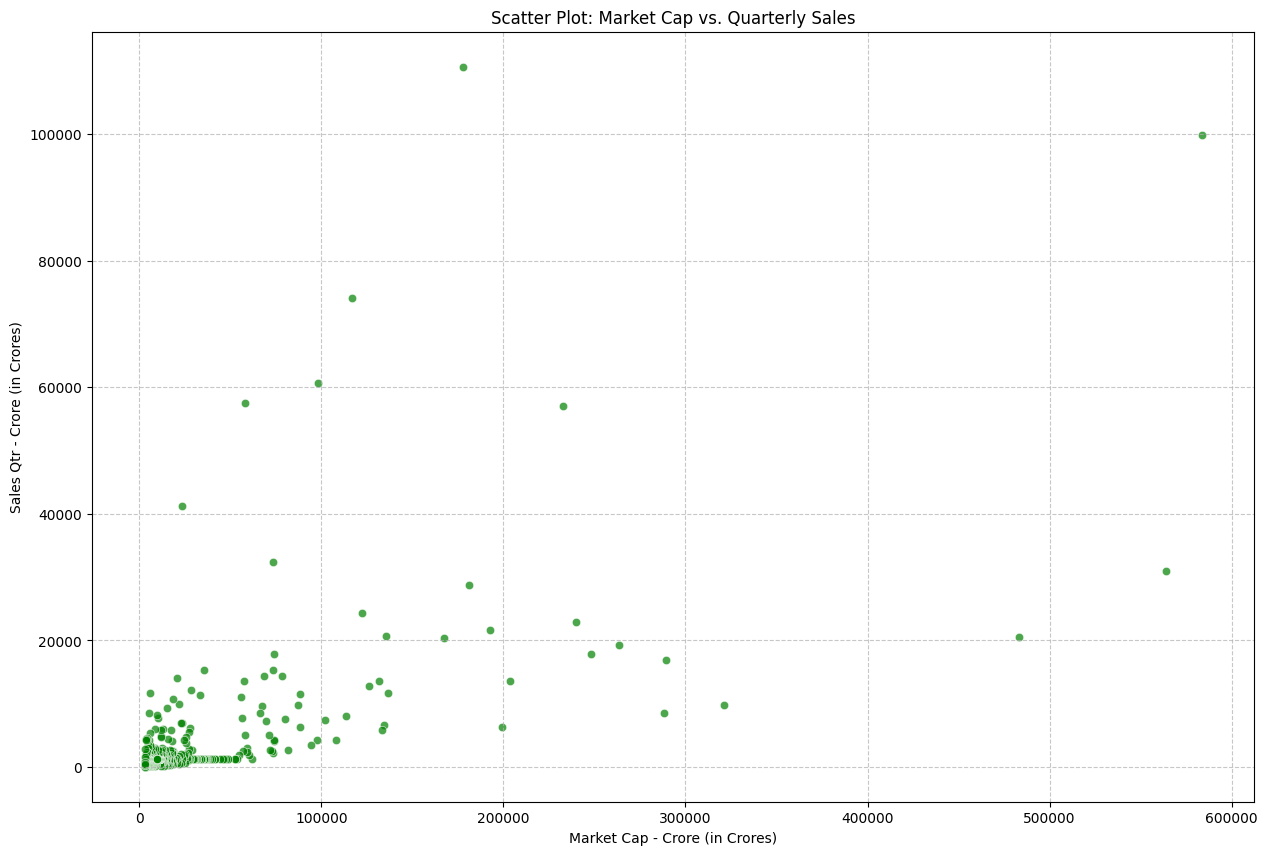

In [18]:
# Scatter plot between Market Cap and Sales
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Mar Cap - Crore', y='Sales Qtr - Crore', data=df, color='green', alpha=0.7)
plt.title('Scatter Plot: Market Cap vs. Quarterly Sales')
plt.xlabel('Market Cap - Crore (in Crores)')
plt.ylabel('Sales Qtr - Crore (in Crores)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Calculate the correlation between Market Cap and Quarterly Sales
correlation = df['Mar Cap - Crore'].corr(df['Sales Qtr - Crore'])

In [26]:
correlation

0.6204889718974033

In [27]:
from sklearn.linear_model import LinearRegression

# Prepare the data
X = df[['Mar Cap - Crore']]
y = df['Sales Qtr - Crore']

# Fit the linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Get the coefficients
intercept = regression_model.intercept_
slope = regression_model.coef_[0]
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")


Intercept: 786.14, Slope: 0.10


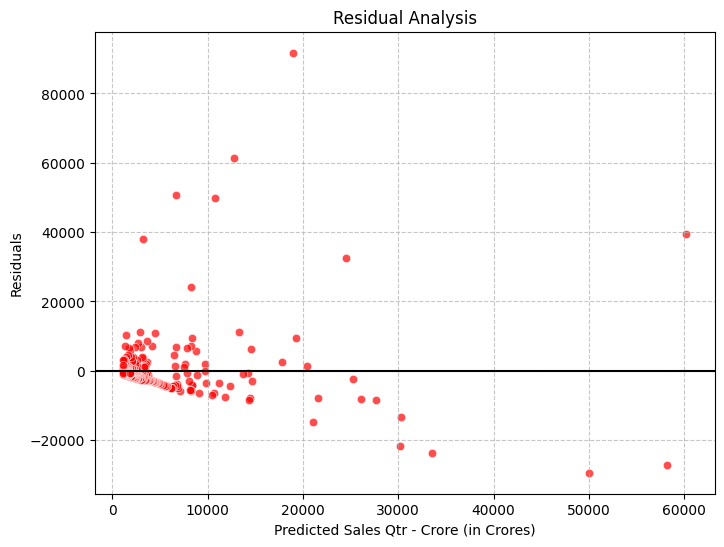

In [28]:
# Predict sales using the linear regression model
predicted_sales = regression_model.predict(X)

# Calculate residuals
residuals = y - predicted_sales

# Visualize residuals
plt.figure(figsize=(8, 6))
sns.scatterplot(x=predicted_sales, y=residuals, color='red', alpha=0.7)
plt.title('Residual Analysis')
plt.xlabel('Predicted Sales Qtr - Crore (in Crores)')
plt.ylabel('Residuals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='-')
plt.show()


In [30]:
from scipy.stats import pearsonr

# Perform Pearson correlation coefficient test
correlation_coefficient, p_value = pearsonr(df['Mar Cap - Crore'], df['Sales Qtr - Crore'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}, p-value: {p_value:.5f}")


Pearson Correlation Coefficient: 0.62, p-value: 0.00000


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Fit a random forest regressor
forest_model = RandomForestRegressor()
forest_model.fit(X, y)

# Feature importance
feature_importance = forest_model.feature_importances_
print(f"Feature Importance: {feature_importance[0]:.2f}")


Feature Importance: 1.00


In [33]:
# Extract the unique names from the 'Name' column
unique_names = df['Name'].unique()

# Print the list of unique names
print(unique_names)


['Reliance Inds.' 'TCS' 'HDFC Bank' 'ITC' 'H D F C' 'Hind. Unilever'
 'Maruti Suzuki' 'Infosys' 'O N G C' 'St Bk of India' 'ICICI Bank'
 'Kotak Mah. Bank' 'Coal India' 'Larsen & Toubro' 'I O C L'
 'Bharti Airtel' 'Axis Bank' 'NTPC' 'Sun Pharma.Inds.' 'Hind.Zinc' 'Wipro'
 'HCL Technologies' 'Vedanta' 'Tata Motors' 'UltraTech Cem.'
 'Asian Paints' 'Power Grid Corpn' 'B P C L' 'IndusInd Bank' 'Bajaj Fin.'
 'Bajaj Auto' 'M & M' 'HDFC Stand. Life' 'Adani Ports' 'Bajaj Finserv'
 'GAIL (India)' 'Avenue Super.' 'Titan Company' 'JSW Steel' 'Grasim Inds'
 'Tata Steel' 'Eicher Motors' 'Nestle India' 'Godrej Consumer' 'Yes Bank'
 'Hero Motocorp' 'Motherson Sumi' 'SBI Life Insuran' 'General Insuranc'
 'Bharti Infra.' 'Dabur India' 'Bosch' 'Shree Cement' 'New India Assura'
 'H P C L' 'ICICI Pru Life' 'Britannia Inds.' 'Tech Mahindra'
 'Hindalco Inds.' 'Zee Entertainmen' 'Cairn India' 'Indiabulls Hous.'
 'Ambuja Cem.' 'Interglobe Aviat' 'Cipla' 'Piramal Enterp.'
 'United Spirits' 'Pidilite Inds.' 'Si

In [39]:
industry = {
    "Automobile": ["Maruti Suzuki", "Tata Motors", "Mahindra & Mahindra (M&M)", "Ashok Leyland", "Eicher Motors"],
    "Energy": ["ONGC", "Indian Oil Corporation Limited (IOCL)", "NTPC", "Power Grid Corporation of India", "Bharat Petroleum Corporation Limited (BPCL)", "Oil India", "Cairn India", "GAIL (India)", "Petronet LNG", "NMDC", "HPCL", "MRPL"],
    "Mining": ["Coal India", "Hindustan Zinc", "Vedanta", "Tata Steel", "JSW Steel", "Jindal Steel", "Hindalco Industries", "National Mineral Development Corporation (NMDC)", "SAIL"],
    "Pharmaceuticals": ["Sun Pharmaceuticals Industries", "Dr. Reddy's Laboratories", "Lupin", "Cipla", "Biocon", "Aurobindo Pharma", "Cadila Healthcare"],
    "Telecommunications": ["Bharti Airtel", "Vodafone Idea (Idea Cellular)"],
    "Cement and Building Materials": ["UltraTech Cement", "ACC", "Shree Cement", "Ambuja Cements"],
    "Consumer Durables": ["Titan Company", "Whirlpool India", "Havells India", "Siemens", "Bosch"],
    "FMCG (Fast-Moving Consumer Goods)": ["Emami", "Berger Paints", "Rajesh Exports", "Page Industries", "Dalmia Bharat", "Dabur India", "Colgate-Palmolive", "Godrej Consumer Products", "Nestle India", "Procter & Gamble Hygiene and Health Care", "Gillette India", "Britannia Industries", "Marico", "ITC", "Hindustan Unilever"],
    "Insurance": ["ICICI Lombard General Insurance", "New India Assurance", "LIC Housing Finance", "Edelweiss Financial Services", "Cholamandalam Investment and Finance Company", "Bajaj Finserv", "M&M Financial Services", "L&T Finance Holdings", "IIFL Holdings", "Aditya Birla Capital", "Shriram Transport Finance", "Punjab National Bank", "Power Finance Corporation", "Rural Electrification Corporation", "United Breweries", "Yes Bank", "Axis Bank"],
    "Retail": ["Avenue Supermarts (Avenue Super.)", "Future Retail"],
    "Construction and Engineering": ["Larsen & Toubro (L&T)", "Shree Cement", "Siemens", "Bosch"]
}



In [44]:
# Calculate the mean 'Mar Cap' and 'Sales Qtr - Crore' for each industry
industry_means = {}
for industry_name, companies in industry.items():  # Corrected iteration
    industry_data = df[df['Name'].isin(companies)]
    mean_mar_cap = industry_data['Mar Cap - Crore'].mean()
    mean_sales_qtr = industry_data['Sales Qtr - Crore'].mean()
    industry_means[industry] = {'Mean Mar Cap': mean_mar_cap, 'Mean Sales Qtr': mean_sales_qtr}




AttributeError: 'str' object has no attribute 'items'

In [35]:
# Convert the dictionary to a DataFrame
industry_means_df = pd.DataFrame.from_dict(industry_means, orient='index')

NameError: name 'industry_means' is not defined

In [ ]:

# Plotting
plt.figure(figsize=(14, 8))
industry_means_df.sort_values(by='Mean Mar Cap', ascending=False, inplace=True)
industry_means_df.plot(kind='bar', y=['Mean Mar Cap', 'Mean Sales Qtr'], color=['skyblue', 'salmon'])
plt.title('Mean Market Capitalization and Quarterly Sales by Industry')
plt.xlabel('Industry')
plt.ylabel('Amount (in Crores)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
